# Exercise 11 - Statistics on the Iris Dataset

Let's consider the Iris Dataset that we used the other week.

In [50]:
from bokeh.sampledata.iris import flowers

In [51]:
flowers.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Categorical vs Quantitative Variables

"sepal_length", "sepal_width", "petal_length", "petal_width" are quantitative (i.e. numerical) variables. "species" is a categorical (i.e. with a limited number of values) variable. "Species" can assume three values: "virginica", "versicolor", and "setosa". Verify this on the Dataframe

In [52]:
# here verify that "species" only allows three different values
...

### Histograms and KDE
Using your visualization library of choice (matplotlib, seaborn or bokeh) plot the histograms and the Kernel Density Estimate (KDE) of the "sepal_width" variable within the sample for each species ("virginica", "versicolor", and "setosa"). You should produce three histograms and KDE.

In [53]:
# an option would be to create a DataFrame per categorical variable, and then use the Data
# you can use the property 'column' of DataFrame.plot.hist to specify the 'sepal_width' column, and the 'by' property
# to plot histograms for each separate groups
sepal_width = flowers[['sepal_width', 'species']].copy()
virginica = sepal_width[(sepal_width['species'] == 'virginica')].reset_index(drop=True)
setosa = sepal_width[(sepal_width['species'] == 'setosa')].reset_index(drop=True)
versicolor = sepal_width[(sepal_width['species'] == 'versicolor')].reset_index(drop=True)



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1153387f0>,
      dtype=object)

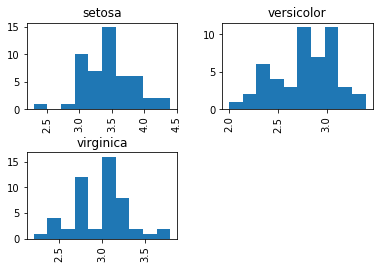

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
flowers.hist(column='sepal_width', by='species')

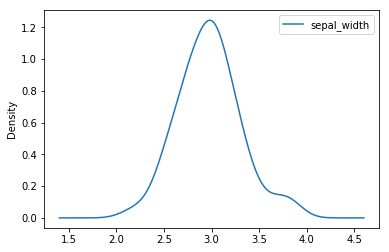

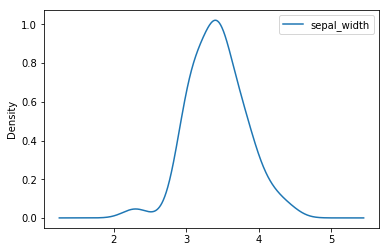

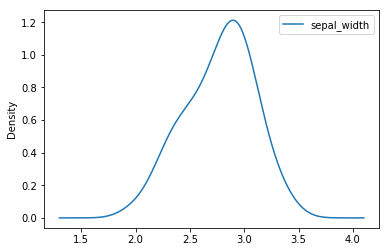

In [55]:
virginica.plot.kde()
setosa.plot.kde()
versicolor.plot.kde()

### T-test
Following the example shown during the class, execute and independent T-test to compare the means of the 'sepal_with' between 'virginica' and 'setosa'. Feel free to verify that the assumptions are validated

In [58]:
from scipy import stats
import pandas as pd
df = pd.concat([virginica['sepal_width'].rename('sw_virginica'), 
                setosa['sepal_width'].rename('sw_setosa'), 
                versicolor['sepal_width'].rename('sw_versicolor')], axis=1)
df.head()

,sw_virginica,sw_setosa,sw_versicolor
0,3.3,3.5,3.2
1,2.7,3.0,3.2
2,3.0,3.2,3.1
3,2.9,3.1,2.3
4,3.0,3.6,2.8


In [60]:
# Run Levene's test for the homogeneity of variances
stats.levene(df['sw_virginica'], df['sw_setosa'])

LeveneResult(statistic=0.9699158091674469, pvalue=0.32712641437439816)

In [61]:
# Levene's test returns a p-value > 0.05, hence the variances are homogeneous
# Run Shapiro's test for normality of residuals
diff = df['sw_virginica'] - df['sw_setosa']
stats.shapiro(diff)

(0.9729832410812378, 0.3047769367694855)

In [62]:
# Shapiro's test returns a p-value > 0.05, hence the normality hypothesis can be accepted.
# We can now run the T-test 
stats.ttest_ind(df['sw_virginica'], df['sw_setosa'])
# The t-test returns a p-value of 10^-9 << 0,.05, hence the two categories have significantly different means

Ttest_indResult(statistic=-6.450349089630728, pvalue=4.24635538184499e-09)

### ANOVA

Similarly to the t-test, run ANOVA to compare the means across the three categories 
('virginica', 'versicolor' and 'setosa'). Then run a Bonferroni correction post hoc test to verify which of the
categories show different means, if any

In [64]:
# write your ANOVA test here
stats.f_oneway(df['sw_virginica'], df['sw_setosa'], df['sw_versicolor'])

F_onewayResult(statistic=49.16004008961206, pvalue=4.492017133309115e-17)

In [65]:
# ANOVA test return p-value << 0.05, hence there is significant difference of the mean values
# across the three categories. We can run the post-hoc tests with Bonferroni correction requiring a p-value < 0.05/3 = 0.01667

stats.ttest_ind(df['sw_virginica'], df['sw_setosa'])


Ttest_indResult(statistic=-6.450349089630728, pvalue=4.24635538184499e-09)

In [66]:
stats.ttest_ind(df['sw_setosa'], df['sw_versicolor'])

Ttest_indResult(statistic=9.454975848128596, pvalue=1.8452599454769322e-15)

In [67]:
stats.ttest_ind(df['sw_versicolor'], df['sw_virginica'])

Ttest_indResult(statistic=-3.2057607502218186, pvalue=0.0018191004238894803)

In [ ]:
# All the three t-tests with Bonferroni correction return a p-value < 0.01667 => we can conclude that all the 
# three categories have significantly different sepal width mean values.